In [562]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

Dataset used: [Synthetic 2-d data with N=5000 vectors and k=15 Gaussian clusters with different degree of cluster overlap](http://cs.joensuu.fi/sipu/datasets/)  
  
$2\text{D}$ data was just chosen for better visualization of the results.

In [563]:
# Converting to df just for better visualization:
df = pd.DataFrame(np.loadtxt('data.txt'), columns = ['Feature 1', 'Feature 2'])
display(df)

,Feature 1,Feature 2
0,664159.0,550946.0
1,665845.0,557965.0
2,597173.0,575538.0
3,618600.0,551446.0
4,635690.0,608046.0
...,...,...
4995,665426.0,853940.0
4996,691827.0,863963.0
4997,650661.0,861267.0
4998,599647.0,858702.0


In [564]:
# Mean Normalization:
X = df.to_numpy()
mu = X.mean(axis=0)
std = X.std(axis=0)
X = (X-mu)/std

x1 = X[:, 0]
x2 = X[:, 1]

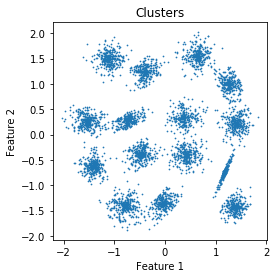

In [565]:
plt.scatter(x1, x2, s=0.5)
plt.gca().set_aspect('equal')
plt.title('Clusters')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

It's easy to see that $15$ well-separated clusters are present.

## K-Means Algorithm:

In [566]:
def init_centroids(X, K):
    m = X.shape[0]
    centroids = X
    
    # Unvectorized implementation
    #for _ in range(K):
        #c = np.random.randint(m)
        #centroids.append(X[c])
        
    # Vectorized:
    np.random.shuffle(centroids) # Modify a sequence in-place by shuffling its contents
    centroids = centroids[:K]
    return np.asarray(centroids)

In [567]:
# Not needed in the vectorized implementation:
def distance(c_i, x_i):
    return (np.linalg.norm(c_i - x_i))**2

In [568]:
def classify(centroids):
    
    # Vectorized: Takes 8s for execution if printing graphs with axes, and a whopping 0.1s when not!
    distances = (np.square(X - centroids[:, np.newaxis])).sum(axis=2) # numpy broadcasting for the win
    return np.argmin(distances, axis=0)
    
    # Unvectorized: Takes 23s for execution
    #y = []
    #for x_i in X:
    #   d_array = [distance(c_i, x_i) for c_i in centroids]     
    #    y.append(np.argmin(d_array))
    #return np.array(y)

In [569]:
# Define the color-map
cmap = plt.cm.jet
# Extract all colors from the .jet map
cmaplist = [cmap(i) for i in range(cmap.N)]
# Create the new map
cmap = cmap.from_list('Custom cmap', cmaplist, cmap.N)

def show_clusters(C, y, i):
    plt.scatter(x1, x2, c=y, cmap=cmap, s=0.5)
    plt.scatter(C[:, 0], C[:, 1], c = 'red', edgecolors='black', s=100, marker='*')
    plt.gca().set_aspect('equal')
    plt.title('Clustering: Step {}'.format(i))
    plt.axis('off')
    plt.show()

In [570]:
def new_centroids(centroids):
    centroids = np.array([np.mean(X[y == k], axis=0) for k in classes])
    return centroids

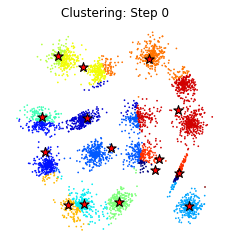

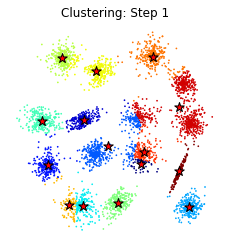

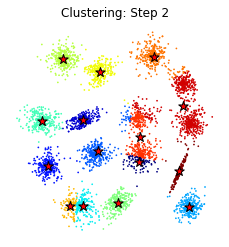

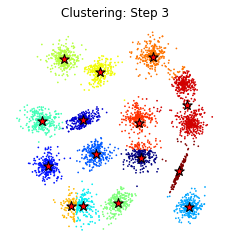

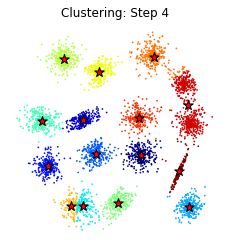

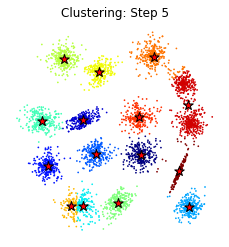

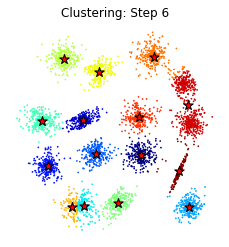

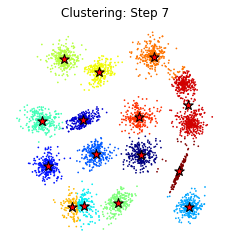

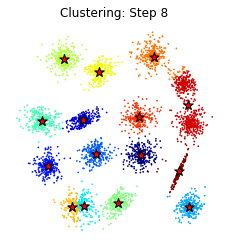

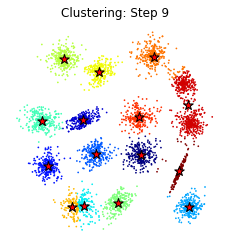

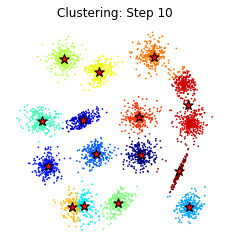

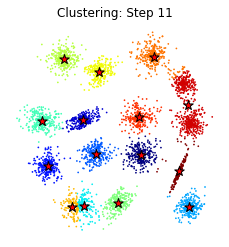

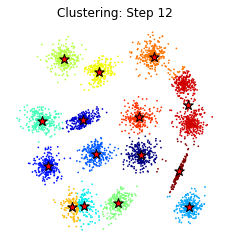

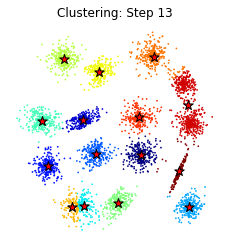

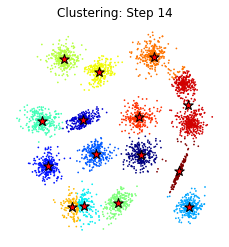

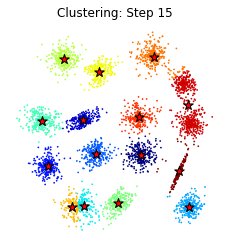

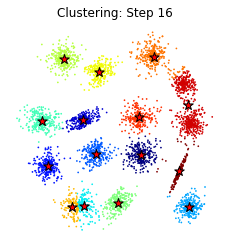

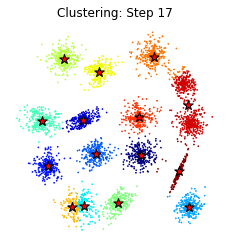

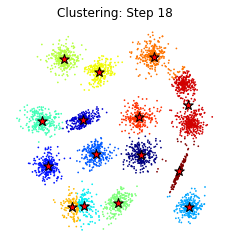

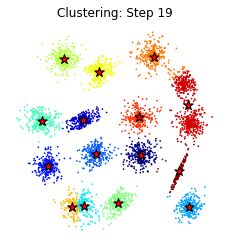

In [571]:
K = 15
classes = np.arange(K)
C = init_centroids(X, K)

for i in range(20):
    y = classify(C)
    C = new_centroids(C)
    show_clusters(C, y, i)

Looks good! (kind of)   

We have hardcoded the value of $\text{K}$ and the stopping condition is not defined.  
We can use some methods to estimate $\text{K}$, but for this problem, that isn't really needed. 